In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('D:\Analysis/Dataset.csv')
df.head()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_135,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_203,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0


#### Залишаємо лише некатегоріальні метрики

In [4]:
columns = df.columns.tolist()[:59]
lst = ['media_source', 'install_date', 'country_code', 'platform']
columns = [i for i in columns if i not in lst]

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Тут реалізована функція побудови залежності вибраної метрики від середнього значення доходу

In [6]:
def scatter_column(column_name, df, main_var):
    new_df = df[[column_name, main_var]]
    lst = new_df[column_name].unique().tolist()
    mean_val = {}
    for i in lst:
        a = new_df[new_df[column_name] == i].mean()[1]
        mean_val[i] = a

    x_val = mean_val.keys()
    y_val = mean_val.values()
    plt.scatter(x_val, y_val)
    plt.xlabel(column_name)
    plt.ylabel("Mean Target_Full_Ltv_Day30")

#### Оскільки всі графіки метрик не відображаються роботою одного циклу, ми вирішили розбити весь список метрик на 3 частини

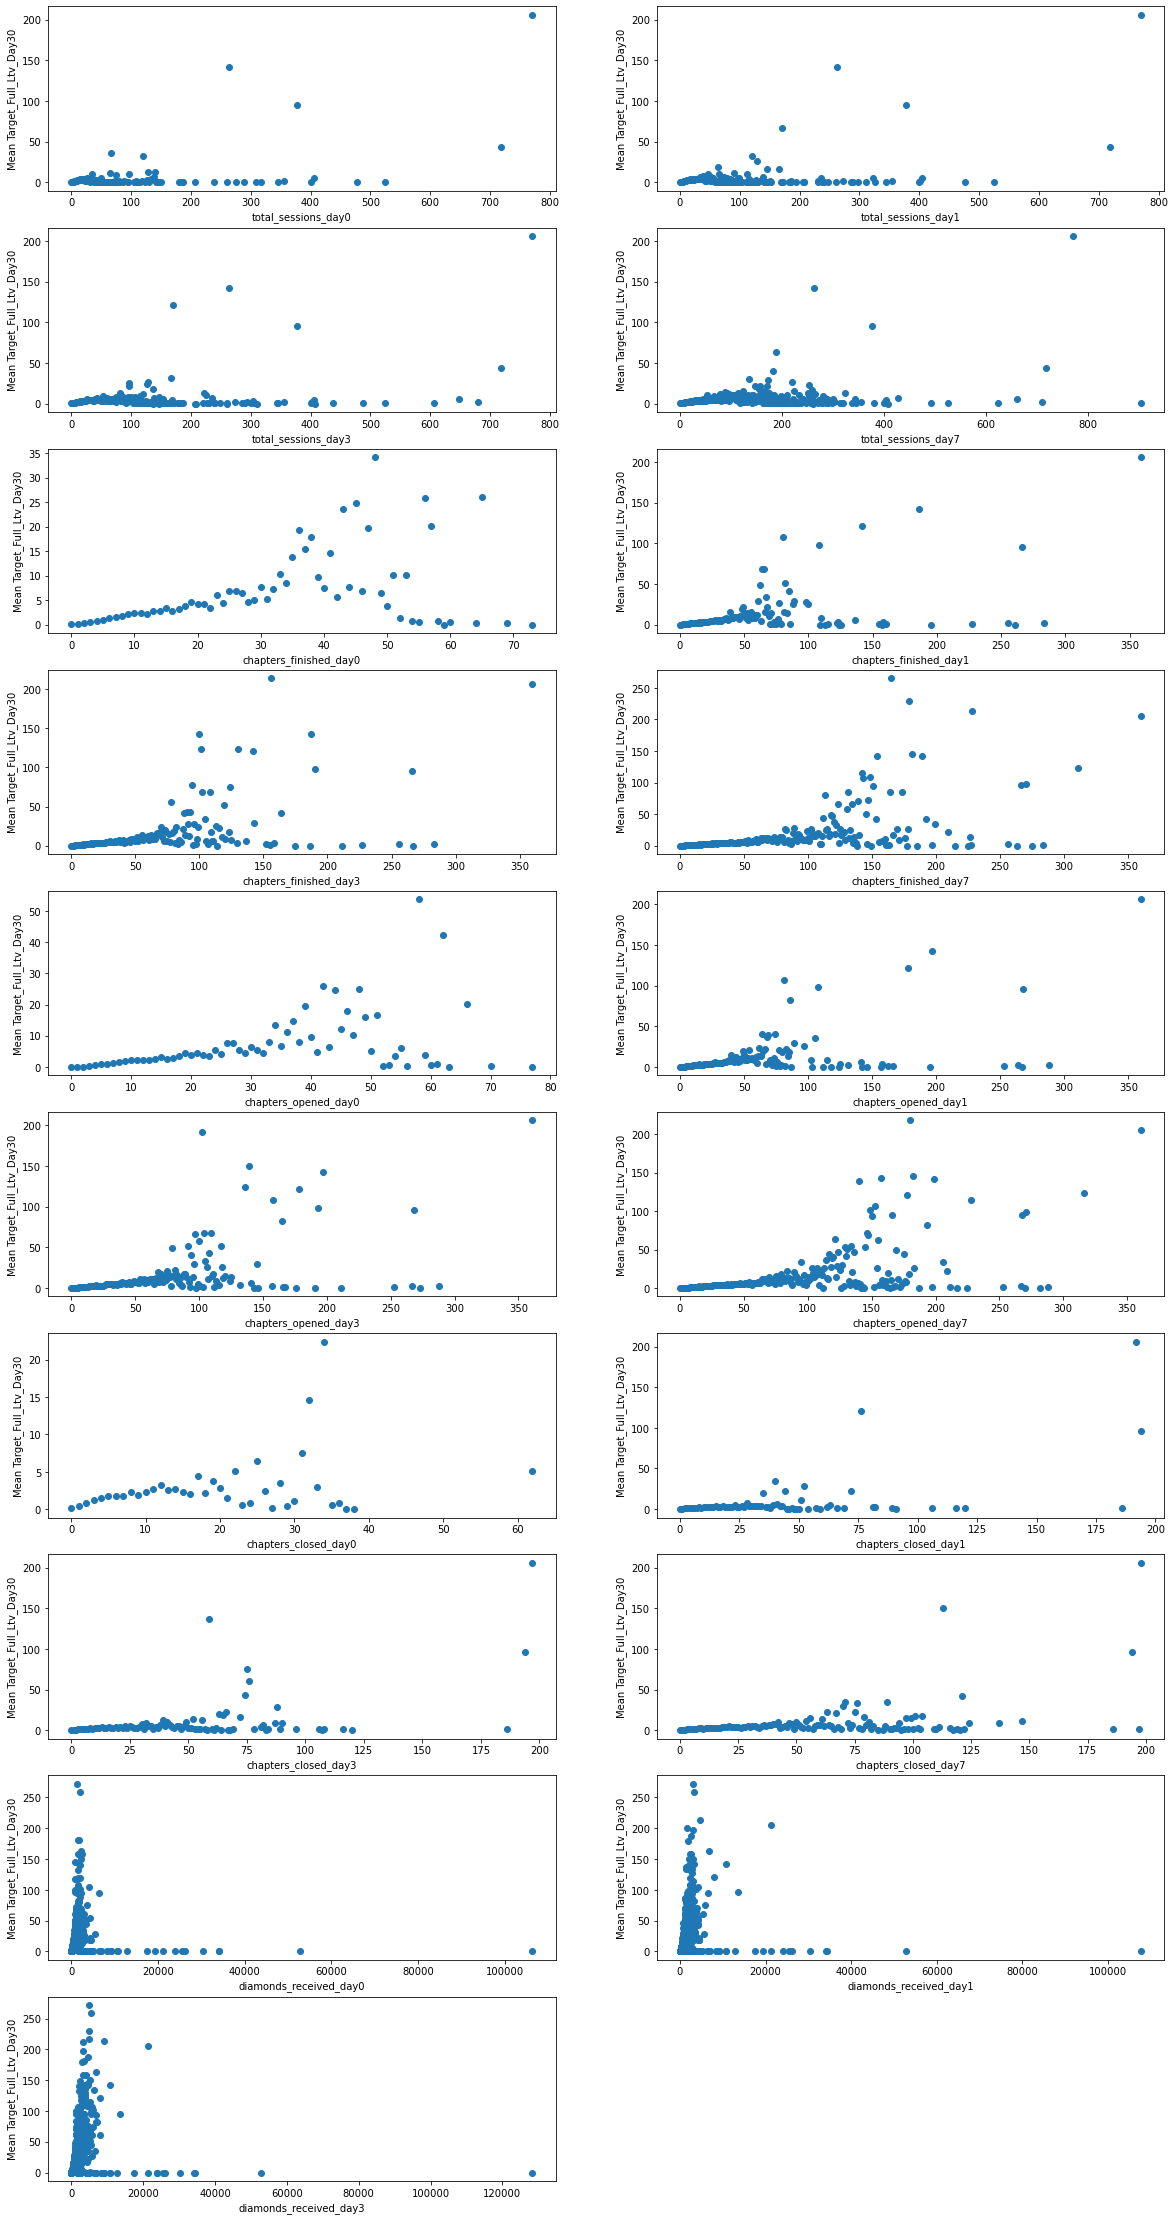

In [37]:
list_1 = columns[:19]
list_2 = columns[19:46]
list_3 = columns[46:]

# Тут реалізовані графіки першої частини метрик
main_var = 'target_full_ltv_day30'
plt.figure(figsize=(20,40))
for r in enumerate(list_1):
    plt.subplot(10, 2, r[0] +1)
    scatter_column(r[1], df, main_var)

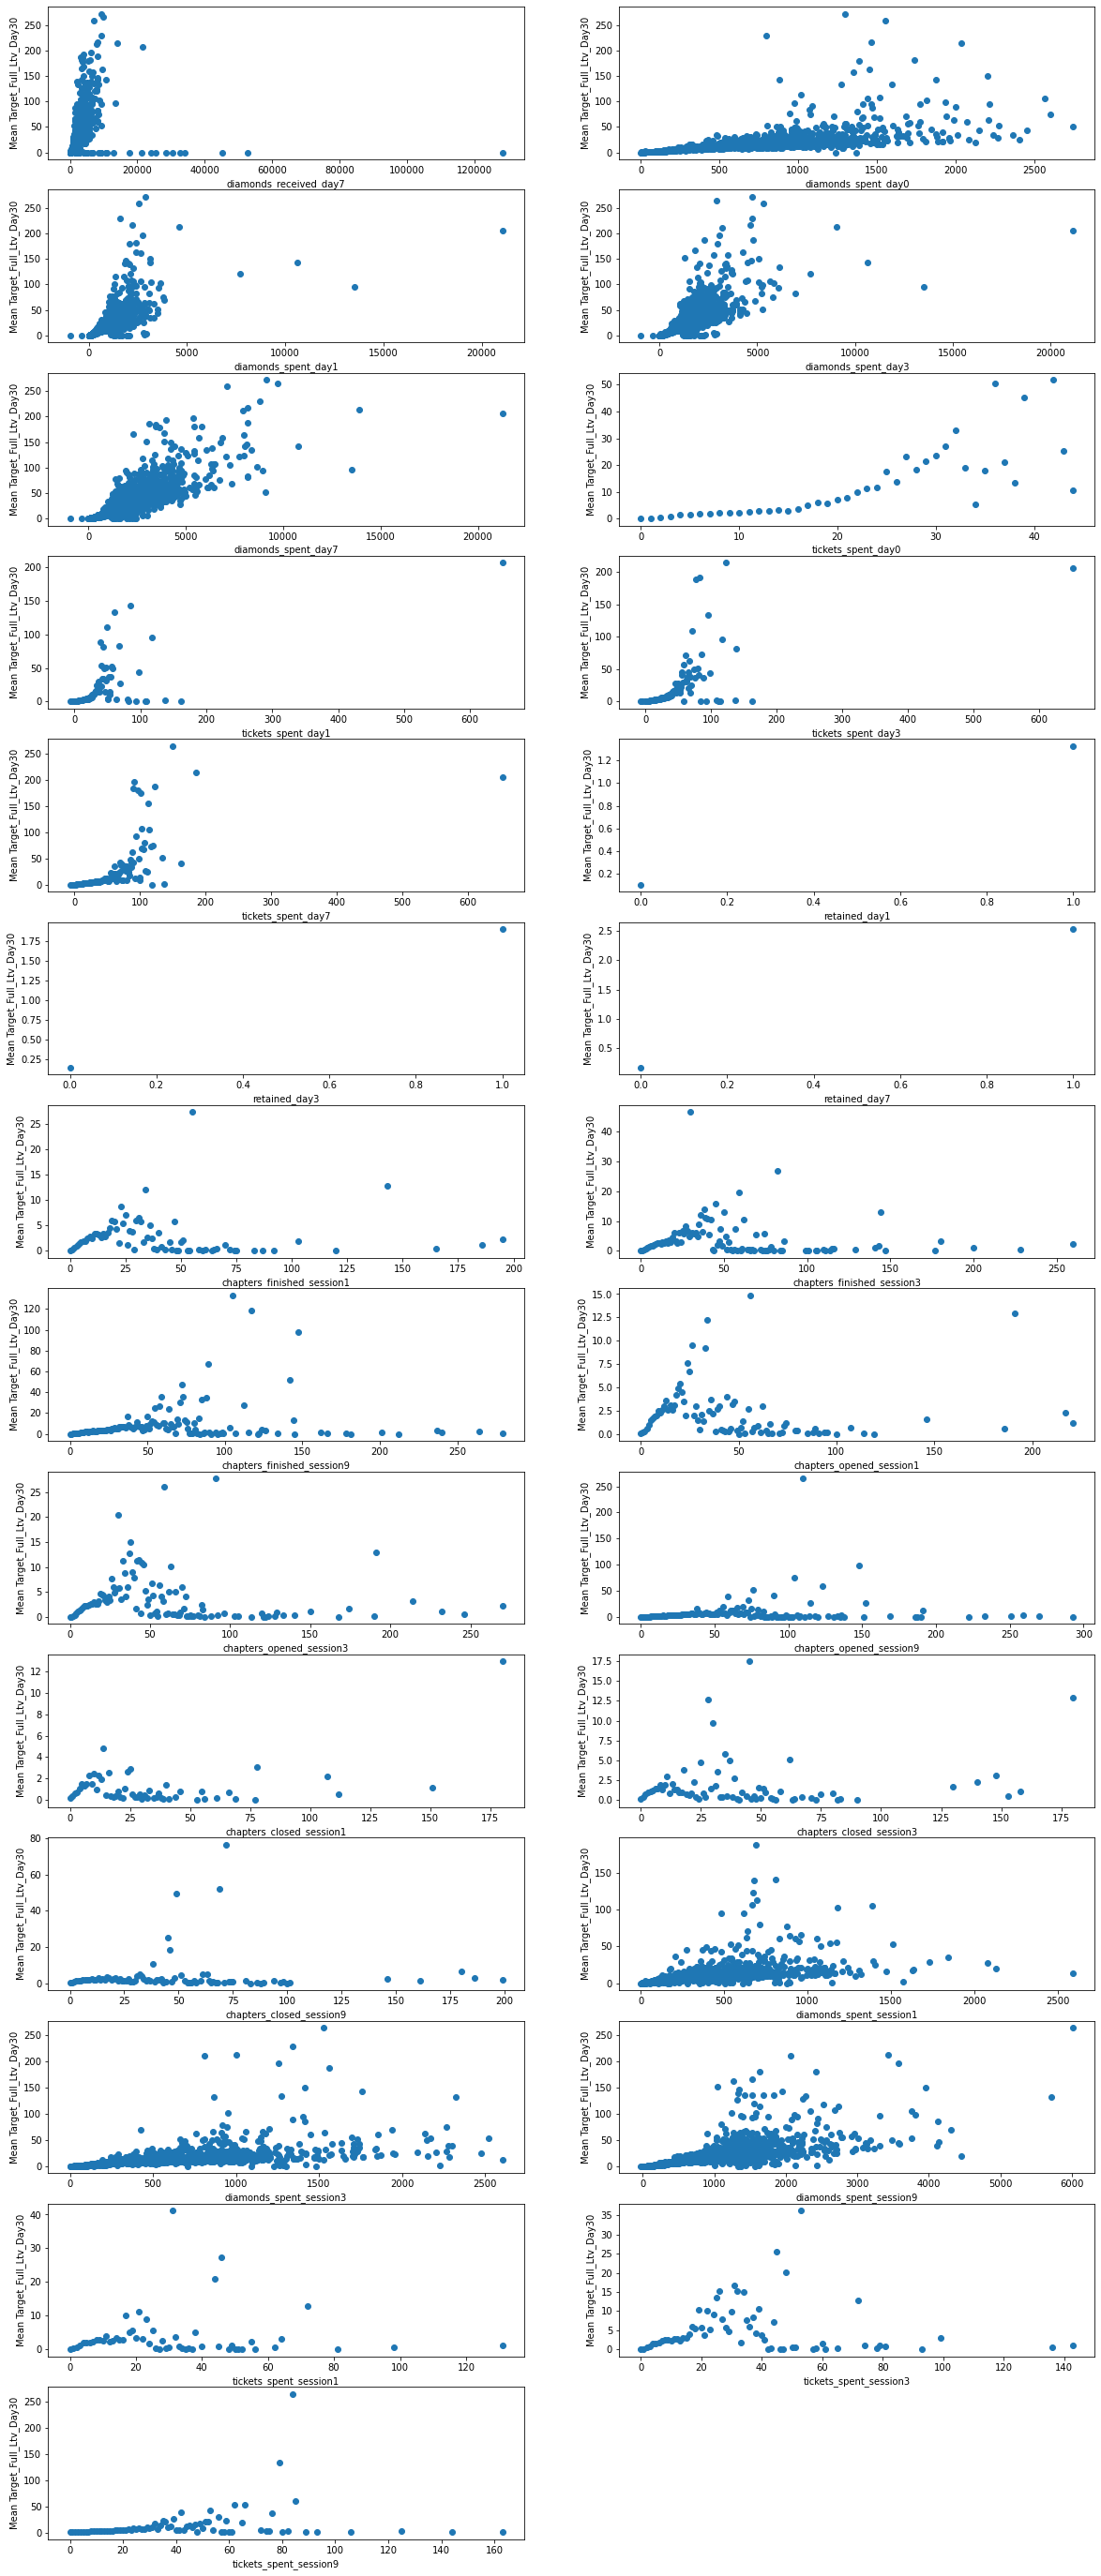

In [38]:
# Тут реалізовані графіки другої частини графіків
plt.figure(figsize=(20,100))
for r in enumerate(list_2):
    plt.subplot(28, 2, r[0] +1)
    scatter_column(r[1], df, main_var)

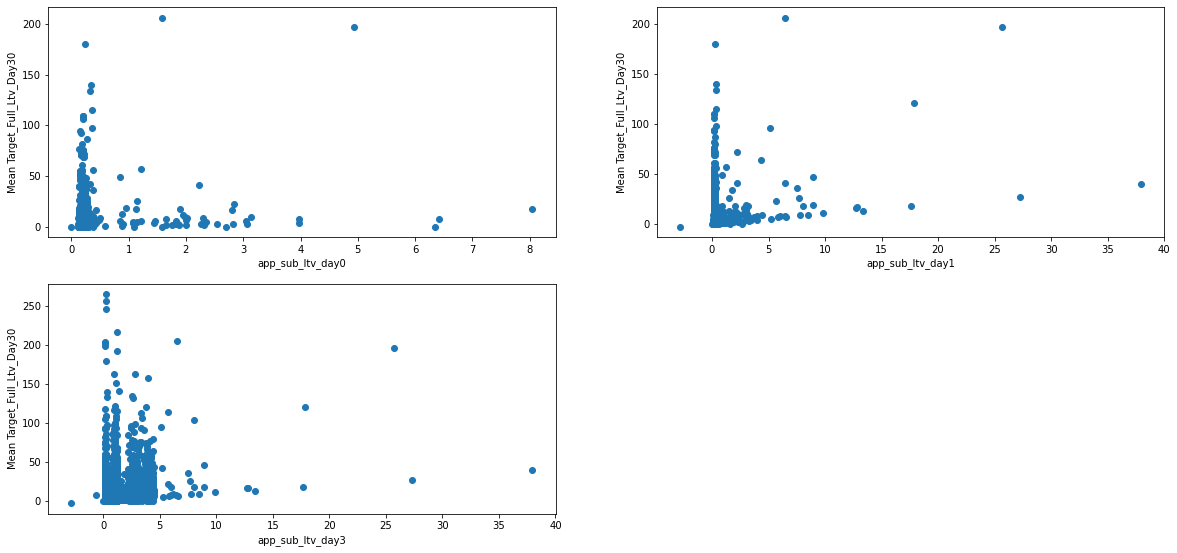

In [17]:
# Заключна частина побудованих графіків


plt.figure(figsize=(20, 0))
main_var = 'target_full_ltv_day30'
plt.subplot(10, 2, 1)
scatter_column('app_sub_ltv_day0', df ,main_var)
plt.subplot(10, 2, 2)
scatter_column('app_sub_ltv_day1', df ,main_var)
plt.subplot(10, 2, 3)
scatter_column('app_sub_ltv_day3', df ,main_var)

Text(0, 0.5, 'Mean Target_Full_Ltv_Day30')

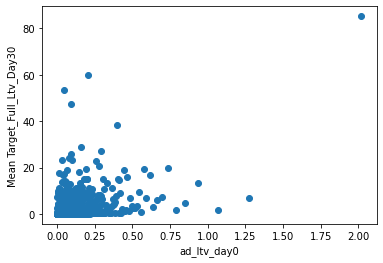

In [19]:

main_var = 'target_full_ltv_day30'
new_df = df[['ad_ltv_day0', main_var]]
lst = new_df['ad_ltv_day0'].unique().tolist()
sorted_list = sorted(lst)
nsl = sorted_list[::100]
mean_val = {}
for i in nsl:
        a = new_df[new_df['ad_ltv_day0'] == i].mean()[1]
        mean_val[i] = a
x_val = mean_val.keys()
y_val = mean_val.values()
plt.scatter(x_val, y_val)
plt.xlabel('ad_ltv_day0')
plt.ylabel("Mean Target_Full_Ltv_Day30")

Text(0, 0.5, 'Mean Target_Full_Ltv_Day30')

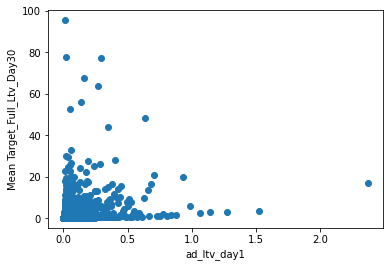

In [20]:
new_df = df[['ad_ltv_day1', main_var]]
lst = new_df['ad_ltv_day1'].unique().tolist()
sorted_list = sorted(lst)
nsl = sorted_list[::100]
mean_val = {}
for i in nsl:
        a = new_df[new_df['ad_ltv_day1'] == i].mean()[1]
        mean_val[i] = a
x_val = mean_val.keys()
y_val = mean_val.values()
plt.scatter(x_val, y_val)
plt.xlabel('ad_ltv_day1')
plt.ylabel("Mean Target_Full_Ltv_Day30")

Text(0, 0.5, 'Mean Target_Full_Ltv_Day30')

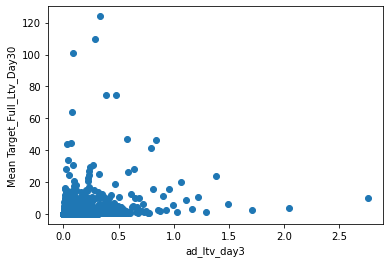

In [21]:
new_df = df[['ad_ltv_day3', main_var]]
lst = new_df['ad_ltv_day3'].unique().tolist()
sorted_list = sorted(lst)
nsl = sorted_list[::100]
mean_val = {}
for i in nsl:
        a = new_df[new_df['ad_ltv_day3'] == i].mean()[1]
        mean_val[i] = a
x_val = mean_val.keys()
y_val = mean_val.values()
plt.scatter(x_val, y_val)
plt.xlabel('ad_ltv_day3')
plt.ylabel("Mean Target_Full_Ltv_Day30")

Text(0, 0.5, 'Mean Target_Full_Ltv_Day30')

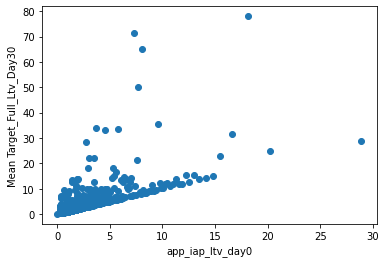

In [22]:
new_df = df[['app_iap_ltv_day0', main_var]]
lst = new_df['app_iap_ltv_day0'].unique().tolist()
sorted_list = sorted(lst)
nsl = sorted_list[::100]
mean_val = {}
for i in nsl:
        a = new_df[new_df['app_iap_ltv_day0'] == i].mean()[1]
        mean_val[i] = a
x_val = mean_val.keys()
y_val = mean_val.values()
plt.scatter(x_val, y_val)
plt.xlabel('app_iap_ltv_day0')
plt.ylabel("Mean Target_Full_Ltv_Day30")

Text(0, 0.5, 'Mean Target_Full_Ltv_Day30')

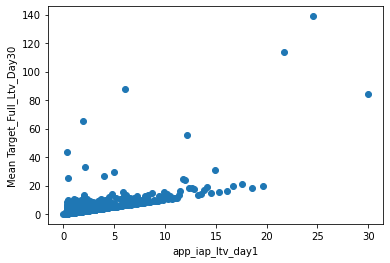

In [23]:
new_df = df[['app_iap_ltv_day1', main_var]]
lst = new_df['app_iap_ltv_day1'].unique().tolist()
sorted_list = sorted(lst)
nsl = sorted_list[::100]
mean_val = {}
for i in nsl:
        a = new_df[new_df['app_iap_ltv_day1'] == i].mean()[1]
        mean_val[i] = a
x_val = mean_val.keys()
y_val = mean_val.values()
plt.scatter(x_val, y_val)
plt.xlabel('app_iap_ltv_day1')
plt.ylabel("Mean Target_Full_Ltv_Day30")

Text(0, 0.5, 'Mean Target_Full_Ltv_Day30')

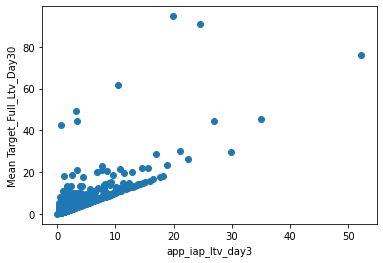

In [24]:
new_df = df[['app_iap_ltv_day3', main_var]]
lst = new_df['app_iap_ltv_day3'].unique().tolist()
sorted_list = sorted(lst)
nsl = sorted_list[::100]
mean_val = {}
for i in nsl:
        a = new_df[new_df['app_iap_ltv_day3'] == i].mean()[1]
        mean_val[i] = a
x_val = mean_val.keys()
y_val = mean_val.values()
plt.scatter(x_val, y_val)
plt.xlabel('app_iap_ltv_day3')
plt.ylabel("Mean Target_Full_Ltv_Day30")